# Predicting Evergreeness of Websites.
### Evergreen sites are those that are always relevant. As opposed to breaking news or current events, evergreen websites are relevant no matter the time or season.

In [2]:
import pandas as pd
import json
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#read the data file and take look.
stum = pd.read_csv("./data/stumbleupon.tsv", sep='\t')
stum.head(2)

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,...,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,4042,"{""title"":""IBM Sees Holographic Calls Air Breat...",business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,...,1,1,24,0,5424,170,8,0.152941,0.079130,0
1,http://www.popsci.com/technology/article/2012-...,8471,"{""title"":""The Fully Electronic Futuristic Star...",recreation,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,...,1,1,40,0,4973,187,9,0.181818,0.125448,1


In [4]:
#get an overview of the data file
stum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7395 entries, 0 to 7394
Data columns (total 27 columns):
url                               7395 non-null object
urlid                             7395 non-null int64
boilerplate                       7395 non-null object
alchemy_category                  7395 non-null object
alchemy_category_score            7395 non-null object
avglinksize                       7395 non-null float64
commonlinkratio_1                 7395 non-null float64
commonlinkratio_2                 7395 non-null float64
commonlinkratio_3                 7395 non-null float64
commonlinkratio_4                 7395 non-null float64
compression_ratio                 7395 non-null float64
embed_ratio                       7395 non-null float64
framebased                        7395 non-null int64
frameTagRatio                     7395 non-null float64
hasDomainLink                     7395 non-null int64
html_ratio                        7395 non-null float64
image_r

### label is the outcome. 1 is evergreen, while 0 is not.

In [5]:
#check null data
stum.isnull().sum()

url                               0
urlid                             0
boilerplate                       0
alchemy_category                  0
alchemy_category_score            0
avglinksize                       0
commonlinkratio_1                 0
commonlinkratio_2                 0
commonlinkratio_3                 0
commonlinkratio_4                 0
compression_ratio                 0
embed_ratio                       0
framebased                        0
frameTagRatio                     0
hasDomainLink                     0
html_ratio                        0
image_ratio                       0
is_news                           0
lengthyLinkDomain                 0
linkwordscore                     0
news_front_page                   0
non_markup_alphanum_characters    0
numberOfLinks                     0
numwords_in_url                   0
parametrizedLinkRatio             0
spelling_errors_ratio             0
label                             0
dtype: int64

#### Split the big boilerplate variable into it's parts

In [6]:
#Get website titles form 'boilerplate' and store them into a new column, title.
stum['title'] = stum['boilerplate'].apply(lambda x: json.loads(x).get('title', ''))
stum['title'].head()

0    IBM Sees Holographic Calls Air Breathing Batte...
1    The Fully Electronic Futuristic Starting Gun T...
2    Fruits that Fight the Flu fruits that fight th...
3                  10 Foolproof Tips for Better Sleep 
4    The 50 Coolest Jerseys You Didn t Know Existed...
Name: title, dtype: object

In [7]:
#Get website body form 'boilerplate' and store them into a new column, body.
stum['body'] = stum['boilerplate'].apply(lambda x: json.loads(x).get('body', ''))
stum['body'].head()

0    A sign stands outside the International Busine...
1    And that can be carried on a plane without the...
2    Apples The most popular source of antioxidants...
3    There was a period in my life when I had a lot...
4    Jersey sales is a curious business Whether you...
Name: body, dtype: object

In [8]:
stum[['title','body']].isnull().sum() #There are failed extractions.

title    12
body     57
dtype: int64

### Analyze the categorial features to see if they may affect the probablity of the evergreen outcome.

In [9]:
#Check the evergreen pecentage for news and non-news groups.
# label 1 means evergreen, 0 means not evergreen!
print(stum.groupby(['is_news'])['label'].mean())
#Check the total amount of news and non-news websites. 
print(stum.groupby(['is_news'])['label'].count())

is_news
1    0.516916
?    0.507562
Name: label, dtype: float64
is_news
1    4552
?    2843
Name: label, dtype: int64


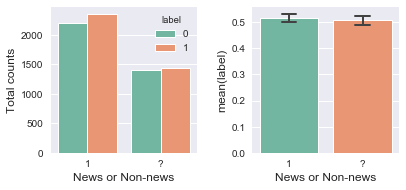

In [10]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(6,3))
sns.countplot(x='is_news', 
               hue='label',
               data=stum,
               palette='Set2',
               edgecolor='white',
               linewidth=1,
               ax=ax1)
ax1.set_ylabel('Total counts', fontsize=12)
ax1.set_xlabel('News or Non-news',fontsize=12)

sns.barplot(x='is_news', 
               y='label',
               estimator=np.mean,
               data=stum,
               palette='Set2',
               errwidth=2,
               capsize=0.2,
               edgecolor='white',
               linewidth=1,
               ax=ax2)
ax2.set_ylabel('mean(label)', fontsize=12)
ax2.set_xlabel('News or Non-news',fontsize=12)
plt.tight_layout(pad=2, w_pad=2, h_pad=1)
sns.plt.show()
sns.plt.close()

#### News or non-news does not strongly impact the evergreen probability.

In [11]:
#Check the evergreen pecentage for the alchemy_category groups.
print(stum.groupby(['alchemy_category'])[['label']].mean())

                       label
alchemy_category            
?                   0.502135
arts_entertainment  0.371945
business            0.711364
computer_internet   0.246622
culture_politics    0.457726
gaming              0.368421
health              0.573123
law_crime           0.419355
recreation          0.684296
religion            0.416667
science_technology  0.456747
sports              0.205263
unknown             0.333333
weather             0.000000


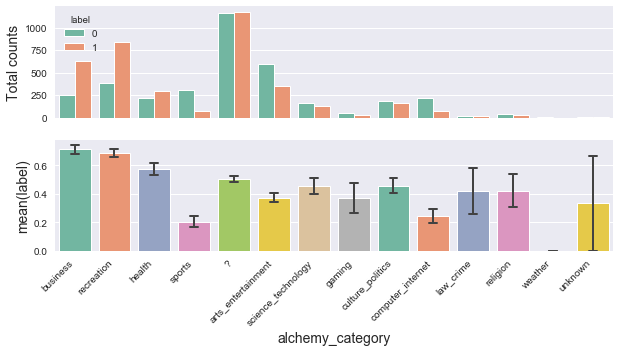

In [12]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10,4.5))
sns.countplot(x='alchemy_category', 
               hue='label',
               data=stum,
               palette='Set2',
               edgecolor='white',
               linewidth=1,
               ax=ax1)
ax1.set_ylabel('Total counts', fontsize=14)
ax1.set_xlabel('')

sns.barplot(x='alchemy_category', 
               y='label',
               estimator=np.mean,
               data=stum,
               palette='Set2',
               errwidth=2,
               capsize=0.2,
               edgecolor='white',
               linewidth=1,
               ax=ax2)
ax2.set_ylabel('mean(label)', fontsize=14)
ax2.set_xlabel('alchemy_category',fontsize=14)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.plt.show()
sns.plt.close()

In [13]:
cat = stum['alchemy_category'].unique()
cat_dict = dict(zip(cat, range(len(cat))))
print(cat_dict)

{'business': 0, 'recreation': 1, 'health': 2, 'sports': 3, '?': 4, 'arts_entertainment': 5, 'science_technology': 6, 'gaming': 7, 'culture_politics': 8, 'computer_internet': 9, 'law_crime': 10, 'religion': 11, 'weather': 12, 'unknown': 13}


In [14]:
#apply works on a row / column basis of a DataFrame, 
#applymap works element-wise on a DataFrame, 
#and map works element-wise on a Series.
stum['al_cat']=stum['alchemy_category'].map(lambda x: cat_dict.get(x) if x in cat_dict else x)
print(stum['al_cat'].head())
print('number of nulls:',stum['al_cat'].isnull().sum())

0    0
1    1
2    2
3    2
4    3
Name: al_cat, dtype: int64
number of nulls: 0


#### Some categories, such business, recreation, arts_entertainment, computer_internet, are prone to be evergreen or not evergreen.

In [15]:
#Check the evergreen pecentage for other categorial variables.
print(stum.groupby(['news_front_page'])[['label']].mean())

                    label
news_front_page          
0                0.519221
1                0.469388
?                0.495994


In [16]:
print(stum.groupby(['hasDomainLink'])[['label']].mean())

                  label
hasDomainLink          
0              0.513678
1              0.496815


In [17]:
print(stum.groupby(['lengthyLinkDomain'])[['label']].mean())

                      label
lengthyLinkDomain          
0                  0.490446
1                  0.525087


In [18]:
print(stum.groupby(['framebased'])[['label']].mean())

              label
framebased         
0           0.51332


In [19]:
stum['news_fpage']=stum['news_front_page'].map(lambda x: 2 if x == '?' else x)
stum['news']=stum['is_news'].map(lambda x: 0 if x == '?' else x)

#### None of these features shows strong association with evergreeness or non-evergreeness.

In [20]:
#create a new recipe column which consists of 1 for title containing 'recipe' and 0 for not.
stum['recipe'] = stum['title'].str.contains('recipe')
stum.groupby(['recipe'])[['label']].mean()

,label
recipe,
False,0.494452
True,0.892351


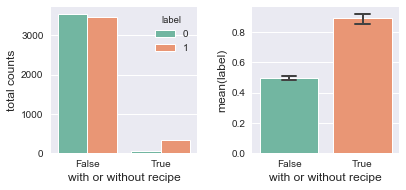

In [21]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(6,3))
sns.countplot(x='recipe', 
               hue='label',
               data=stum,
               palette='Set2',
               edgecolor='white',
               linewidth=1,
               ax=ax1)
ax1.set_ylabel('total counts', fontsize=12)
ax1.set_xlabel('with or without recipe',fontsize=12)

sns.barplot(x='recipe', 
               y='label',
               estimator=np.mean,
               data=stum,
               palette='Set2',
               errwidth=2,
               capsize=0.2,
               edgecolor='white',
               linewidth=1,
               ax=ax2)
ax2.set_ylabel('mean(label)', fontsize=12)
ax2.set_xlabel('with or without recipe',fontsize=12)
plt.tight_layout(pad=2, w_pad=2, h_pad=1)
sns.plt.show()
sns.plt.close()

#### Websites with titles containing recipe are prone to be evergreen.

### Analyze the continuous features to see if they are associated with evergreeness or not.

In [22]:
stum.columns

Index(['url', 'urlid', 'boilerplate', 'alchemy_category',
       'alchemy_category_score', 'avglinksize', 'commonlinkratio_1',
       'commonlinkratio_2', 'commonlinkratio_3', 'commonlinkratio_4',
       'compression_ratio', 'embed_ratio', 'framebased', 'frameTagRatio',
       'hasDomainLink', 'html_ratio', 'image_ratio', 'is_news',
       'lengthyLinkDomain', 'linkwordscore', 'news_front_page',
       'non_markup_alphanum_characters', 'numberOfLinks', 'numwords_in_url',
       'parametrizedLinkRatio', 'spelling_errors_ratio', 'label', 'title',
       'body', 'al_cat', 'news_fpage', 'news', 'recipe'],
      dtype='object')

In [23]:
stum['label'].value_counts()

1    3796
0    3599
Name: label, dtype: int64

In [24]:
spell=stum.groupby(['label'])[['spelling_errors_ratio']].mean()
print(spell,'\n',spell.ix[0]/spell.ix[1])

       spelling_errors_ratio
label                       
0                   0.105987
1                   0.096702 
 spelling_errors_ratio    1.096017
dtype: float64


In [25]:
palinkr=stum.groupby(['label'])[['parametrizedLinkRatio']].mean()
print(palinkr,'\n',palinkr.ix[1]/palinkr.ix[0])

       parametrizedLinkRatio
label                       
0                   0.170856
1                   0.174768 
 parametrizedLinkRatio    1.022894
dtype: float64


In [26]:
nword=stum.groupby(['label'])[['numwords_in_url']].mean()
print(nword,'\n',nword.ix[0]/nword.ix[1])

       numwords_in_url
label                 
0             5.043068
1             4.882508 
 numwords_in_url    1.032885
dtype: float64


In [27]:
nlink=stum.groupby(['label'])[['numberOfLinks']].mean()
print(nlink,'\n',nlink.ix[1]/nlink.ix[0])

       numberOfLinks
label               
0         163.976104
1         192.766070 
 numberOfLinks    1.175574
dtype: float64


In [28]:
nonmark=stum.groupby(['label'])[['non_markup_alphanum_characters']].mean()
print(nonmark,'\n',nonmark.ix[1]/nonmark.ix[0])

       non_markup_alphanum_characters
label                                
0                         4827.207836
1                         6559.832192 
 non_markup_alphanum_characters    1.358929
dtype: float64


In [29]:
linkws=stum.groupby(['label'])[['linkwordscore']].mean()
print(linkws,'\n',linkws.ix[0]/linkws.ix[1])

       linkwordscore
label               
0          33.716866
1          26.626185 
 linkwordscore    1.266305
dtype: float64


In [30]:
lenlink=stum.groupby(['label'])[['lengthyLinkDomain']].mean()
print(lenlink,'\n',lenlink.ix[1]/lenlink.ix[0])

       lengthyLinkDomain
label                   
0               0.644346
1               0.675448 
 lengthyLinkDomain    1.048269
dtype: float64


In [31]:
imr=stum.groupby(['label'])[['image_ratio']].mean()
print(imr,'\n',imr.ix[0]/imr.ix[1])

       image_ratio
label             
0         0.309741
1         0.243443 
 image_ratio    1.272336
dtype: float64


In [32]:
htmlr=stum.groupby(['label'])[['html_ratio']].mean()
print(htmlr,'\n',htmlr.ix[0]/htmlr.ix[1])

       html_ratio
label            
0        0.236535
1        0.231164 
 html_ratio    1.023234
dtype: float64


In [33]:
fmtr=stum.groupby(['label'])[['frameTagRatio']].mean()
print(fmtr,'\n',fmtr.ix[0]/fmtr.ix[1])

       frameTagRatio
label               
0           0.064414
1           0.048846 
 frameTagRatio    1.318723
dtype: float64


In [34]:
embr=stum.groupby(['label'])[['embed_ratio']].mean()
print(embr,'\n',embr.ix[0]/embr.ix[1])

       embed_ratio
label             
0        -0.116196
1        -0.091950 
 embed_ratio    1.263687
dtype: float64


In [35]:
compressr=stum.groupby(['label'])[['compression_ratio']].mean()
print(compressr,'\n',compressr.ix[0]/compressr.ix[1])

       compression_ratio
label                   
0               2.605038
1               1.923330 
 compression_ratio    1.354441
dtype: float64


In [36]:
cmlr4=stum.groupby(['label'])[['commonlinkratio_4']].mean()
print(cmlr4,'\n',cmlr4.ix[1]/cmlr4.ix[0])

       commonlinkratio_4
label                   
0               0.043261
1               0.054952 
 commonlinkratio_4    1.270252
dtype: float64


In [37]:
cmlr3=stum.groupby(['label'])[['commonlinkratio_3']].mean()
print(cmlr3,'\n',cmlr3.ix[1]/cmlr3.ix[0])

       commonlinkratio_3
label                   
0               0.081618
1               0.101965 
 commonlinkratio_3    1.249287
dtype: float64


In [38]:
cmlr2=stum.groupby(['label'])[['commonlinkratio_2']].mean()
print(cmlr2,'\n',cmlr2.ix[1]/cmlr2.ix[0])

       commonlinkratio_2
label                   
0               0.201499
1               0.226008 
 commonlinkratio_2    1.121636
dtype: float64


In [39]:
cmlr1=stum.groupby(['label'])[['commonlinkratio_1']].mean()
print(cmlr1,'\n',cmlr1.ix[1]/cmlr1.ix[0])

       commonlinkratio_1
label                   
0               0.450840
1               0.484718 
 commonlinkratio_1    1.075143
dtype: float64


In [40]:
avgls=stum.groupby(['label'])[['avglinksize']].mean()
print(avgls,'\n',avgls.ix[1]/avgls.ix[0])

       avglinksize
label             
0         2.707187
1         2.813624 
 avglinksize    1.039316
dtype: float64


In [41]:
#stum.groupby(['label'])['alchemy_category_score']

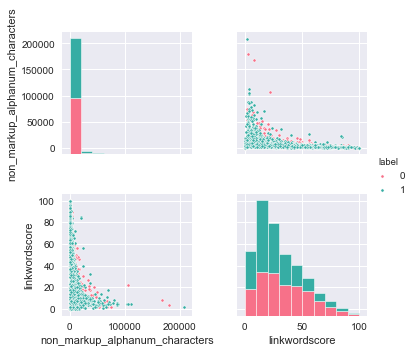

In [42]:
#select several continuous variables to plot pairgrid to see if label values can be seperated along certain axis. 
df0=stum[['label','non_markup_alphanum_characters','linkwordscore']]

g0 = sns.PairGrid(data=df0, 
                  vars=df0.columns[1:],
                  hue='label', 
                  hue_order=None, 
                  palette='husl', 
                  x_vars=None, 
                  y_vars=None, 
                  diag_sharey=False, 
                  size=2.5, 
                  aspect=1, 
                  despine=True, 
                  dropna=True)
    
g0 = g0.map_diag(plt.hist, edgecolor="white", linewidth=0.5)
g0 = g0.map_offdiag(plt.scatter, edgecolor="white", linewidth=0.5, s=10)
g0 = g0.add_legend()

sns.plt.show()
sns.plt.close()
#'compression_ratio','frameTagRatio','image_ratio','non_markup_alphanum_characters','linkwordscore','frameTagRatio'

### Now build and evaluate a model.

In [43]:
from sklearn.tree import DecisionTreeClassifier
df1=stum[['label','non_markup_alphanum_characters','compression_ratio','frameTagRatio',
          'image_ratio','linkwordscore','embed_ratio','recipe','al_cat']].dropna(axis=0)
X = df1.drop('label',axis=1)
y = df1['label']

#'lengthyLinkDomain','news_fpage','hasDomainLink','commonlinkratio_3','commonlinkratio_4','embed_ratio'
#'image_ratio','linkwordscore',

In [44]:
df1.shape

(7383, 9)

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [46]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

#creating a plot_roc_curve funstion that we can call later
def plot_roc_curve(target_test, target_predicted_proba, this_label):
    fpr, tpr, thresholds = roc_curve(target_test, target_predicted_proba[:,1], drop_intermediate=False)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    fig, ax = plt.subplots(figsize=(5,5))
    ax.plot(fpr, tpr, 'r-', label= this_label + '\n' + 'ROC Area = %0.3f' % roc_auc)
    ax.plot([0, 1], [0, 1], 'k-.')
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.set_xlabel('False Positive Rate (1 - Specifity)', fontsize=15)
    ax.set_ylabel('True Positive Rate (Sensitivity)',fontsize=15)
    plt.legend(loc='lower right',fontsize=15)
    plt.title('ROC',fontsize=20)

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,GridSearchCV

params1 = {'criterion':['gini','entropy'],
           'splitter':['best','random'],
           'min_samples_split':[2,5,8,11],
           'min_samples_leaf':[19,22,25]}
kf1 = KFold(n_splits=10, shuffle=True)
gs1 = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=params1,cv=kf1,scoring='accuracy')
mod1 = gs1.fit(X_train, y_train)
print('Done!')

Done!


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=25,
            min_samples_split=8, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='random')

 0.668980697596


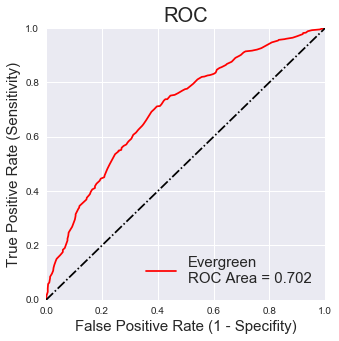

In [48]:
#print(pd.DataFrame(mod1.cv_results_))
print(mod1.best_estimator_)
print('\n',mod1.best_score_)

#calling roc curve function
plot_roc_curve(y_test, mod1.predict_proba(X_test), 'Evergreen')

In [49]:
params2 = {'criterion':['gini','entropy'],
           'splitter':['best','random'],
           'min_samples_split':[2,5,8,11],
           'min_samples_leaf':[19,22,25],
           'n_estimators':[1000]}
gs2 = GridSearchCV(estimator=RandomForestClassifier(),param_grid=params2,cv=kf1,scoring='accuracy')
mod2 = gs1.fit(X_train, y_train)
print('Done!')

Done!


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=19,
            min_samples_split=11, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='random')

 0.669488655604


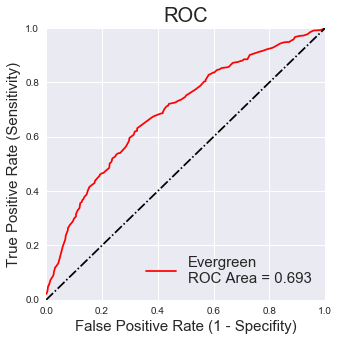

In [50]:
#print(pd.DataFrame(mod2.cv_results_))
print(mod2.best_estimator_)
print('\n',mod2.best_score_)

#calling roc curve function
plot_roc_curve(y_test, mod1.predict_proba(X_test), 'Evergreen')

In [51]:
# Function to visualize Decision Trees (creating a tree.dot file whitch can be converted to an image)
from sklearn.tree import export_graphviz
from os import system 

def tree_dot(model,feat_df):
    f = open("./data/tree.dot", 'w')
    export_graphviz(decision_tree=model,out_file=f,feature_names=feat_df.columns)
    f.close()

#create a dot file using best estimators from the grid search.
tree_dot(mod1.best_estimator_, X)

In [52]:
#convert the dot file to a png file using the graphviz package.
system('dot -Tpng ./data/tree.dot -o ./data/tree.png')

0

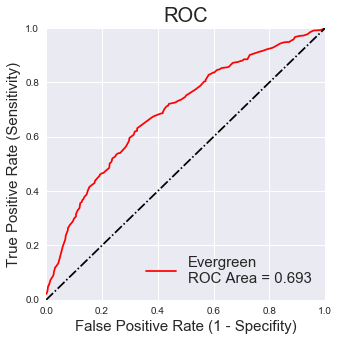

In [53]:
#create a model using the best estimators from the grid search.
clf=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_split=1e-07, min_samples_leaf=25,
                            min_samples_split=8, min_weight_fraction_leaf=0.0,
                            presort=False, random_state=None, splitter='random').fit(X_train,y_train)
plot_roc_curve(y_test, mod1.predict_proba(X_test), 'Evergreen')

#create a dot file using the model.
tree_dot(clf, X)

#### This is the tree.

<img src="data/tree.png">